# Email Spam Classification

## Download Dataset

This project was implemented using [this Kaggle dataset](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset), and made based on [Greg Hogg's tutorial](https://www.youtube.com/watch?v=hOuvYcw_sVQ) to Spam Classification.

## Spam Detector

In [31]:
# Import necessary libraries

import pandas as pd
import nltk

In [32]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [33]:
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'])

In [34]:
df = df.rename(columns={'v1': 'Category', 'v2': 'Message'})

In [35]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [38]:
df.loc[df['Category'] == 'ham', 'Category'] = 0
df.loc[df['Category'] == 'spam', 'Category'] = 1

In [39]:
df

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [40]:
df['Category'].value_counts()

0    4825
1     747
Name: Category, dtype: int64

### Understanding how to process tokens

In [62]:
# Explore to understand tokenization (convert words to tokens, removing signals around)
tokenizer = nltk.RegexpTokenizer(r"\w+")
test_message = "This,! Looks like a -good- text message. Here goes an <HTML>"

test_message_tokenized = tokenizer.tokenize(test_message)
test_message_tokenized

['This',
 'Looks',
 'like',
 'a',
 'good',
 'text',
 'message',
 'Here',
 'goes',
 'an',
 'HTML']

In [63]:
# Lowercase all tokens for normalization
test_message_lowercased = [t.lower() for t in test_message_tokenized]
test_message_lowercased

['this',
 'looks',
 'like',
 'a',
 'good',
 'text',
 'message',
 'here',
 'goes',
 'an',
 'html']

In [64]:
from nltk.stem import  WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

# Lemmatize all tokens, meaning, find 'generic word' containing the meaning for each token (e.g., looks -> look)
test_message_lemmatized_tokens = [lemmatizer.lemmatize(t) for t in test_message_lowercased]
test_message_lemmatized_tokens

['this',
 'look',
 'like',
 'a',
 'good',
 'text',
 'message',
 'here',
 'go',
 'an',
 'html']

In [65]:
from nltk.corpus import stopwords

stopwords = stopwords.words('english')

# Filter stopwords, words common to most texts that don't really bring a meaning (e.g., it, a, he...)
test_message_useful_tokens = [t for t in test_message_lemmatized_tokens if t not in stopwords]
test_message_useful_tokens

['look', 'like', 'good', 'text', 'message', 'go', 'html']

### Retrieving tokens from the dataset

In [67]:
def message_to_token_list(s):
    tokens = tokenizer.tokenize(s)
    lowercased_tokens = [t.lower() for t in tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(t) for t in lowercased_tokens]
    useful_tokens = [t for t in lemmatized_tokens if t not in stopwords]
    
    return useful_tokens

message_to_token_list(test_message)

['look', 'like', 'good', 'text', 'message', 'go', 'html']

In [70]:
df = df.sample(frac=1, random_state=1)
df = df.reset_index(drop=True)

split_index = int(len(df) * 0.8)
train_df, test_df = df[:split_index], df[split_index:]

train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

train_df, test_df

(     Category                                            Message
 0           0                           Convey my regards to him
 1           0           [Û_] anyway, many good evenings to u! s
 2           0  My sort code is  and acc no is . The bank is n...
 3           0                        Sorry i din lock my keypad.
 4           1  Hi babe its Chloe, how r u? I was smashed on s...
 ...       ...                                                ...
 4452        0  Aah! A cuddle would be lush! I'd need lots of ...
 4453        0  Hey i will be late... i'm at amk. Need to drin...
 4454        0  Babe! I fucking love you too !! You know? Fuck...
 4455        0              We have to pick rayan macleran there.
 4456        0                 I will spoil you in bed as well :)
 
 [4457 rows x 2 columns],
      Category                                            Message
 0           0  Hello, my love! How goes that day ? I wish you...
 1           0  S...from the training manual it 

In [71]:
token_counter = {}

for message in train_df['Message']:
    message_as_token_lst = message_to_token_list(message)
    
    for token in message_as_token_lst:
        if token in token_counter:
            token_counter[token] += 1
        else:
            token_counter[token] = 1
            
len(token_counter)

7156

In [72]:
token_counter

{'convey': 8,
 'regard': 6,
 'û_': 10,
 'anyway': 24,
 'many': 44,
 'good': 204,
 'evening': 25,
 'u': 1015,
 'sort': 11,
 'code': 24,
 'acc': 5,
 'bank': 14,
 'natwest': 1,
 'reply': 117,
 'confirm': 10,
 'sent': 55,
 'right': 77,
 'person': 34,
 'sorry': 128,
 'din': 7,
 'lock': 1,
 'keypad': 1,
 'hi': 110,
 'babe': 73,
 'chloe': 1,
 'r': 140,
 'wa': 197,
 'smashed': 2,
 'saturday': 13,
 'night': 92,
 'great': 101,
 'weekend': 30,
 'missing': 27,
 'sp': 8,
 'visionsms': 1,
 'com': 62,
 'text': 174,
 'stop': 125,
 '150p': 53,
 'ok': 228,
 'thk': 39,
 'got': 197,
 'wan': 40,
 '2': 422,
 'come': 197,
 'wat': 78,
 'oi': 2,
 'gonna': 40,
 'ring': 17,
 'office': 27,
 'around': 43,
 '4': 260,
 'pm': 16,
 'going': 128,
 'hospital': 10,
 'heard': 12,
 'job': 35,
 'wildlife': 1,
 'talk': 36,
 'tonight': 48,
 'want2come': 1,
 'that2worzels': 1,
 'wizzle': 1,
 'whatever': 10,
 'oh': 90,
 'god': 36,
 'almost': 12,
 'home': 135,
 'dear': 101,
 'free': 230,
 'message': 93,
 'without': 25,
 'recharg

In [78]:
def keep_token(processed_token, threshold):
    if processed_token not in token_counter:
        return false
    else:
        return token_counter[processed_token] > threshold

**Choosing the threshold for the repetitions**

In the cell below, choosing the **threshold** value means defining *how many times* a token needs to appear to be part of the features set.

The value of 200 was found after trying different options, and results with 16 tokens in the features set. As an example, if the threshold was set to 150, then the features set would have 25 tokens remaining. **You can play with this value to test different values and observe the performance of the models created**.

In [158]:
threshold = 200
features = set()

for token in token_counter:
    if keep_token(token, threshold):
        features.add(token)
        
features

{'2',
 '4',
 'call',
 'day',
 'free',
 'get',
 'go',
 'good',
 'gt',
 'know',
 'like',
 'lt',
 'ok',
 'u',
 'ur',
 'å'}

In [159]:
features = list(features)
features

['u',
 'call',
 'go',
 'get',
 '4',
 'gt',
 'lt',
 'ok',
 'å',
 'like',
 'day',
 '2',
 'ur',
 'free',
 'good',
 'know']

In [120]:
token_to_index_mapping = {t:i for t, i in zip(features, range(len(features)))}
token_to_index_mapping

{'u': 0,
 'call': 1,
 'go': 2,
 'get': 3,
 '4': 4,
 'gt': 5,
 'lt': 6,
 'ok': 7,
 'å': 8,
 'like': 9,
 'day': 10,
 '2': 11,
 'ur': 12,
 'free': 13,
 'good': 14,
 'know': 15}

In [98]:
import numpy as np

def message_to_count_vector(message):
    count_vector = np.zeros(len(features))
    
    processed_list_of_tokens = message_to_token_list(message)
    
    for token in processed_list_of_tokens:
        # Verify if the token belongs to the list of 'important' tokens
        if token not in features:
            continue
        index = token_to_index_mapping[token]
        count_vector[index] += 1
        
    return count_vector

In [107]:
message_to_count_vector(test_df.iloc[2]['Message'])

array([0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [108]:
test_df.iloc[2]

Category                                                    1
Message     Do you want a new Video phone? 600 anytime any...
Name: 2, dtype: object

**Splitting train and test sets**

In [109]:
def df_to_X_y(dff):
  y = dff['Category'].to_numpy().astype(int)

  message_col = dff['Message']
  count_vectors = []

  for message in message_col:
    count_vector = message_to_count_vector(message)
    count_vectors.append(count_vector)

  X = np.array(count_vectors).astype(int)

  return X, y

In [110]:
X_train, y_train = df_to_X_y(train_df)

X_test, y_test = df_to_X_y(test_df)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4457, 16), (4457,), (1115, 16), (1115,))

**Rescaling values to fit between 0 and 1**

In [112]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X_train)

X_train, X_test = scaler.transform(X_train), scaler.transform(X_test)

X_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.11111111, 0.        , 0.        , ..., 0.        , 0.33333333,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.33333333,
        0.5       ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

**Training Logistic Regression and Random Forest models on the dataset**

In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

lr = LogisticRegression().fit(X_train, y_train)
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       974
           1       0.89      0.48      0.62       141

    accuracy                           0.93      1115
   macro avg       0.91      0.73      0.79      1115
weighted avg       0.92      0.93      0.92      1115



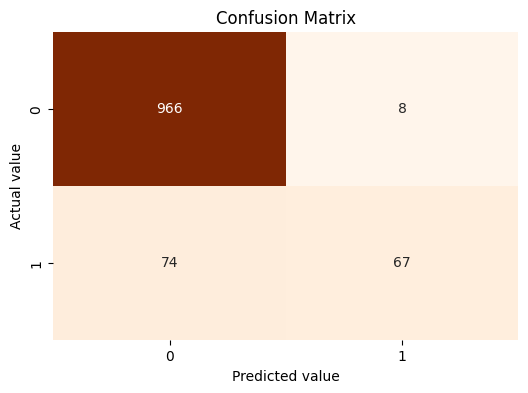

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix=confusion_matrix(y_test,lr.predict(X_test))
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Oranges",cbar=False)
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Confusion Matrix")
plt.show()

In [150]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier().fit(X_train, y_train)
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       974
           1       0.91      0.61      0.73       141

    accuracy                           0.94      1115
   macro avg       0.93      0.80      0.85      1115
weighted avg       0.94      0.94      0.94      1115



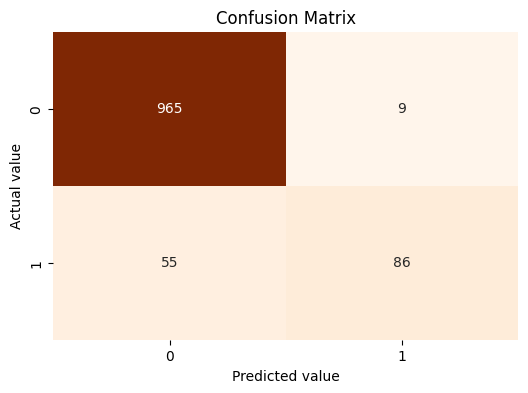

In [151]:
conf_matrix=confusion_matrix(y_test,rf.predict(X_test))
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Oranges",cbar=False)
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Confusion Matrix")
plt.show()

**Conclusion**

Analyzing the metrics of the Logistic Regression and the Random Forest models, we can have the following outcomes:

 * Both models showed high accuracy, due to the fact that both are very good identifying NOT spams
 * When we look specifically at the spam emails, we see that the Random Forest model had considerably better performance, as it:
   * Had less false negatives (55 against 74)
   * Consequently, showed better recall (i.e., identified more of the total spams)
   * While doing better on spams, it didn't lose precision on the ham emails

**Extra: 10 most common words in spam emails**

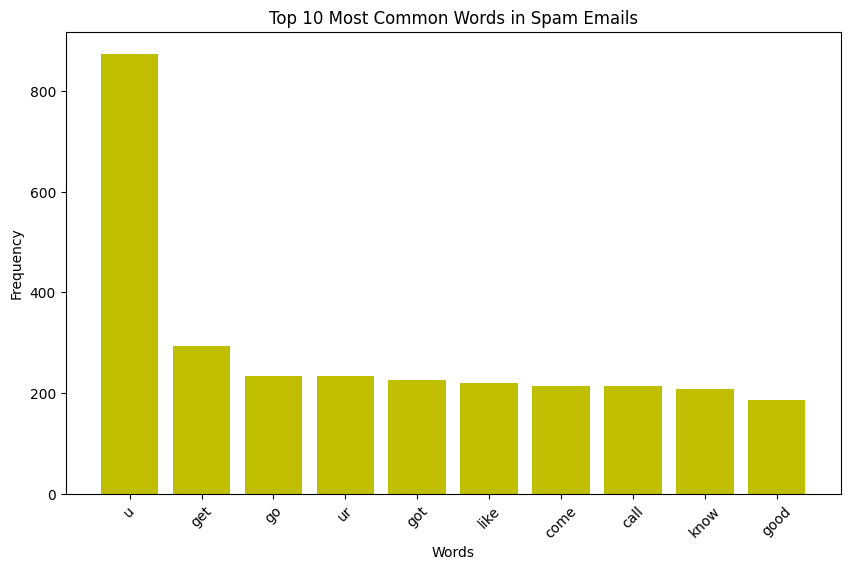

In [163]:
from collections import Counter

# Data visualization - Top 10 Most Common Words in Spam Emails

stop_words = set(stopwords)
spam_words = " ".join(df[df['Category'] == 0]['Message']).split()
ham_words = " ".join(df[df['Category'] == 1]['Message']).split()

spam_word_freq = Counter([word.lower() for word in spam_words if word.lower() not in stop_words and word.isalpha()])

plt.figure(figsize=(10, 6))
plt.bar(*zip(*spam_word_freq.most_common(10)), color='y')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words in Spam Emails')
plt.xticks(rotation=45)
plt.show()